# Machine Learning Project: Stroke Prediction

**Name:** Okba Kharef


## 1.Context

- According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**
1. **id**: unique identifier

2. **gender**: "Male", "Female" or "Other"

3. **age**: age of the patient

4. **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5. **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6. **ever_married**: "No" or "Yes"

7. **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8. **Residence_type**: "Rural" or "Urban"

9. **avg_glucose_level**: average glucose level in blood

10. **bmi**: body mass index

11. **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12. **stroke**: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Reference: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset 


## 2. Project Objective

The goal of this project is to analyze a dataset of patient attributes to predict the likelihood of a stroke. We will perform a comprehensive analysis which includes:

1.  **Exploratory Data Analysis (EDA):** To understand the data's structure, features, and identify potential challenges .
2.  **Data Preprocessing:** To clean and prepare the data for machine learning models.
3.  **Model Training:** To build and train several classification algorithms, including both basic models and more complex ensemble methods.
4.  **Model Evaluation & Comparison:** To evaluate the models using appropriate metrics for an imbalanced dataset and to compare their performance to identify the most effective algorithm.

## 2. Setup: Importing Libraries

This first code block is for importing all the necessary Python libraries for the project.

In [655]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import missingno as msno


from pywaffle import Waffle



# For splitting data and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Optional: for scaling numerical features

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from scipy.stats import wilcoxon

# For evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score,mean_squared_error, mean_absolute_error, make_scorer






# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 3. Loading the Data

Here, we load the dataset from the CSV file into a pandas DataFrame.

In [656]:
# Load the dataset
#dataset URL= https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
df = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')


## 4. Exploratory Data Analysis (EDA)

In this section, we explore the data to understand its properties and find any issues that need to be addressed.

### 4.1. Initial Data Inspection

Let's look at the first few rows, the data types, and a statistical summary.

In [657]:
# Display the first 5 rows of the dataframe
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [658]:
print (f' We have {df.shape[0]} instances with the {df.shape[1]-1} features and 1 output variable')

 We have 5110 instances with the 11 features and 1 output variable


In [659]:
# Get a concise summary of the dataframe, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- In our dataset, we have both numerical and categorical variables.
- It is essential to see whether columns are correctly inferred.
- The most important one to look for is our target variable 'stroke'
- 'Stroke' is detected as an integer, not as an object.
- Target variable is coded as 1 for positive cases (has a stroke) and 0 for negative cases (does not have a stroke)
- Both 'Hypertension' and 'heart disease" are detected as an integer, not as an object. 
- Just remember from the data definition part, they are coded as 1 for the positive cases(has hypertension/heart disease) 
- And 0 for the negative cases (does not have hypertension/heart disease)
- We don't need to change them, but it is good to see and be aware of it.
- In addition to them, we have 3 categorical variables, which we have to encode as numerical.

<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>What Problem We Have?</b></font>
- We have binary classification problem.
- We make prection on the target variable **STROKE**
- And we will build a model to get best prediction on the stroke variable.

<a id="4"></a>
<font color="lightseagreen" size=+1.5><b>Target Variable</b></font>


- One of the first steps of exploratory data analysis should always be to look at what the values of y look like.

In [660]:
y = df['stroke']
print(f'Percentage of patient had a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient did not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient had a stroke: % 4.87 --> (249 patient)
Percentage of patient did not have a stroke: % 95.13 --> (4861 patient)


- Almost %95 of the instances of our target variable is 'No stroke'
-  4861 patient does not have a stroke
- %5  of the instances of our target variable is 'Stroke'
- 249 patient have a stroke.

- We have imbalanced data.


In [661]:
fig = px.histogram(df, x="stroke", title='Stroke', width=400, height=400)
fig.show()

- Our  stroke dataset is an example of a so-called imbalanced dataset.
- There are 19 times more people who didn’t have stroke in our data than who had, and we say that the non-stroke class dominates the stroke class.
- We can clearly see that: the stroke rate in our data is 0.048
- Which is a strong indicator of class imbalance

<a id="5"></a>
<font color="lightseagreen" size=+1.5><b>Imbalance Data</b></font>

- Instances across classes are imbalanced, like in our dataset, we have imbalance data.

- The problem is, most of the machine learning algorithm do not work well with the imbalanced data.

- Some of the metrics (like accuracy) give us misleading results.

- Most of the time in classification problems our interest is to get better predict on the minority class.

- In our example: People had a stroke is minority class.

- Otherwise our machine learning algorithm falsely predicts majority class.

- In our example: No stroke is majority class.

<a id="6"></a>
<font color="lightseagreen" size=+1.5><b>Decide the Metric</b></font>

- This is the first step when approaching a machine learning problem: decide the metric!

- The choice of the wrong metric can mean choosing the wrong algorithm.

- We see that the target is skewed and thus the best metric for this binary classification problem would be Area Under the ROC Curve (AUC). 
- We can use precision and recall too, but AUC combines these two metrics.

- We have already seen the label/target distribution, and we know that it is a binary classification problem with skewed targets. Thus, we will be using StratifiedKFold to split the data

- Just for further info, it is not advisable to use accuracy as an evaluation metric, when dealing with higly imbalanced data. 

In [662]:
# Get descriptive statistics for numerical columns
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [663]:
# This helps check for any rare categories.

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("-" * 30)

Value counts for column: gender
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
------------------------------
Value counts for column: ever_married
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
------------------------------
Value counts for column: work_type
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
------------------------------
Value counts for column: Residence_type
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
------------------------------
Value counts for column: smoking_status
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
------------------------------


### 4.2. Handling Missing Values

-In our initial data inspection with **.info()**, we identified that the bmi column is the only one with missing values. Before we can train our models, we must address these missing entries through imputation, which means filling in the blanks with a substituted value.

In [664]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [665]:
missing_bmi_count = df['bmi'].isnull().sum()
total_rows = len(df)
missing_percentage = (missing_bmi_count / total_rows) * 100

print(f"Number of missing BMI values: {missing_bmi_count}")
print(f"Percentage of missing BMI values: {missing_percentage:.2f}%")

Number of missing BMI values: 201
Percentage of missing BMI values: 3.93%


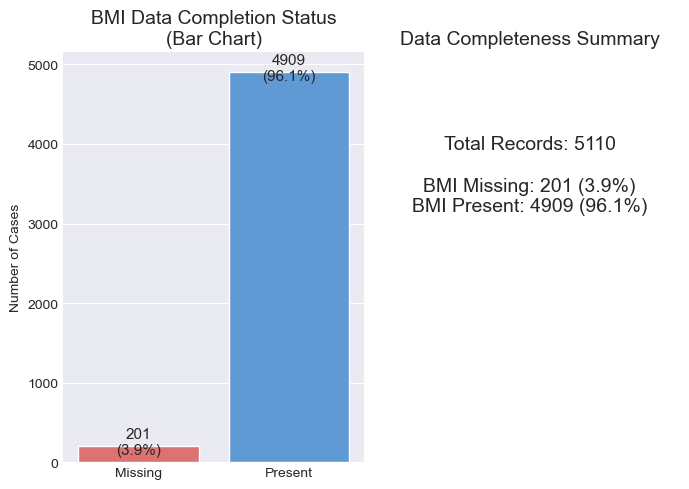

Detailed Summary:
Total records: 5110
Missing BMI: 201 (3.9%)
Available BMI: 4909 (96.1%)


In [666]:
# Visualize missing values in the dataset
# Calculate missing values
total = len(df)
missing = df['bmi'].isna().sum()
present = total - missing
missing_pct = round(missing/total * 100, 1)

# Create visualization
plt.figure(figsize=(7, 5))

# Bar plot
plt.subplot(121)
ax = sns.barplot(x=['Missing', 'Present'], 
                 y=[missing, present], 
                 palette=["#EE6060", "#4c9ae9"])
plt.title('BMI Data Completion Status\n(Bar Chart)', fontsize=14)
plt.ylabel('Number of Cases')

# Add annotations
for i, v in enumerate([missing, present]):
    pct = f'{missing_pct}%' if i == 0 else f'{100-missing_pct}%'
    ax.text(i, v + 50, f'{v}\n({pct})', 
            ha='center', 
            va='center',
            fontsize=11)

# Text-based visualization
plt.subplot(122)
plt.text(0.5, 0.7, 
         f"Total Records: {total}\n\nBMI Missing: {missing} ({missing_pct}%)\nBMI Present: {present} ({100-missing_pct}%)",
         fontsize=14,
         ha='center',
         va='center')
plt.axis('off')
plt.title('Data Completeness Summary', fontsize=14)

plt.tight_layout()
plt.show()

# Print detailed summary
print(f"Detailed Summary:")
print(f"Total records: {total}")
print(f"Missing BMI: {missing} ({missing_pct}%)")
print(f"Available BMI: {present} ({100-missing_pct}%)")

AttributeError: 'Text' object has no property 'Size'

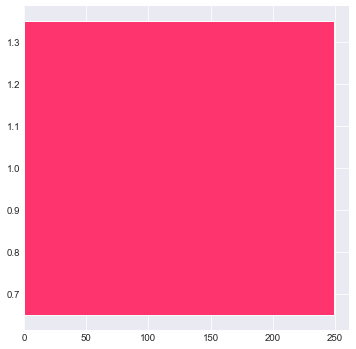

In [ ]:
x = pd.DataFrame( df.groupby(['stroke'])['stroke'].count())

# plot
fig, ax = plt.subplots(figsize = (6,6), dpi = 70)
ax.barh([1], x.stroke[1], height = 0.7, color = '#fe346e')
plt.text(-1150, -0.08, 'Healthy', fontname='Serif', weight='bold', fontsize=16, style='normal', color='#512b58')
plt.text(5000,-0.08, '95%',{'font':'Serif','weight':'bold' ,'size':'16','color':'#512b58'})
ax.barh([0], x.stroke[0], height = 0.7, color = '#512b58')
plt.text(-1000,1, 'Stroke', {'font': 'Serif','weight':'bold','Size': '16','style':'normal', 'color':'#fe346e'})
plt.text(300,1, '5%',{'font':'Serif', 'weight':'bold','size':'16','color':'#fe346e'})

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

plt.text(-1150,1.77, 'Percentage of People Having Strokes' ,{'font': 'Serif', 'Size': '25','weight':'bold', 'color':'black'})
plt.text(4650,1.65, 'Stroke ', {'font': 'Serif','weight':'bold','Size': '16','weight':'bold','style':'normal', 'color':'#fe346e'})
plt.text(5650,1.65, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
plt.text(5750,1.65, 'Healthy', {'font': 'Serif','weight':'bold', 'Size': '16','style':'normal', 'weight':'bold','color':'#512b58'})
plt.text(-1150,1.5, 'It is a highly unbalanced distribution,\nand clearly seen that 5 in 100 people are susceptible \nto heart strokes.', 
        {'font':'Serif', 'size':'12.5','color': 'black'})

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>4.2.1.Choosing the Right Imputation Strategy: Mean vs. Median</b></font>

With approximately **4% of BMI** values missing, simply deleting these rows would cause a loss of valuable data. A better approach is to impute them. The two most common strategies are using the mean or the median value of the column.
- **Mean**: The average value. It is simple but **can be easily influenced by extremely high or low values (outliers)**.
- **Median**: The middle value of the sorted data. It is known to be **robust to outliers**.

To make an informed decision, we must visualize the distribution of the bmi column. This will show us if the data is symmetric or if it is "skewed" by the presence of outliers.

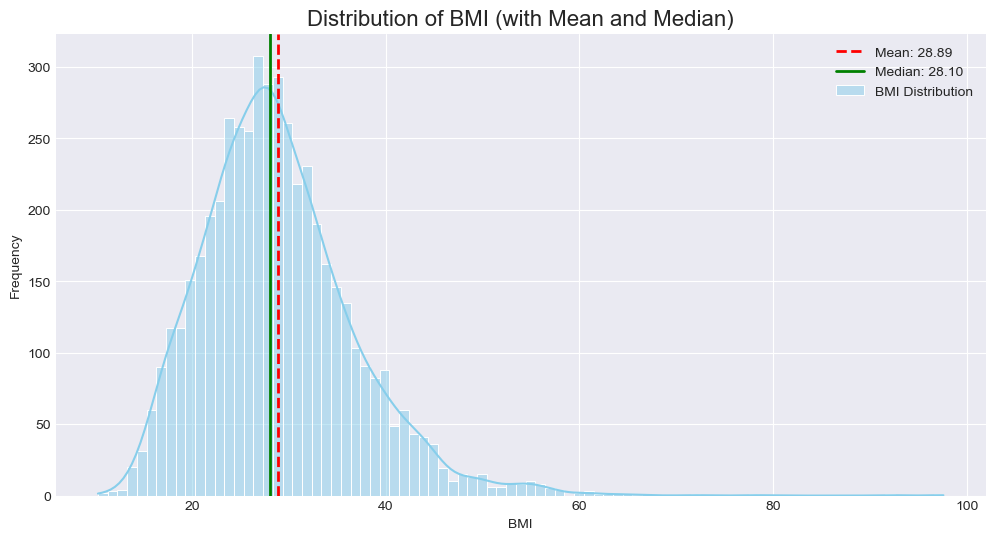

In [667]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))
plt.title('Distribution of BMI (with Mean and Median)', fontsize=16)
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Plot a histogram of the BMI data that is not null
sns.histplot(df['bmi'].dropna(), kde=True, color='skyblue', binwidth=1, label='BMI Distribution')

# Add vertical lines for the mean and median to compare them visually
plt.axvline(df['bmi'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['bmi'].mean():.2f}")
plt.axvline(df['bmi'].median(), color='green', linestyle='-', linewidth=2, label=f"Median: {df['bmi'].median():.2f}")

plt.legend()
plt.show()

<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>4.2.2. Analysis of the Distribution and Final Decision</b></font>

The visualization provides critical insights for our decision:

1. **Right-Skewed Distribution**: The graph is not symmetrical. There is a "tail" extending to the right, which indicates the presence of a minority of patients with very high BMI values **(outliers).**
2. **Mean vs. Median Position**: While the two values are numerically close (Mean: 28.89, Median: 28.10), their positions are telling. The Mean (red line) is positioned slightly to the right of the Median (green line).

**Conclusion**: This slight difference is visual proof that the outliers in the tail are pulling the Mean towards them. Even though the effect is small, it confirms the Mean is being influenced by extreme values. The Median, located at the center of the main population hump, is unaffected. For this reason, **the Median is the more statistically robust and honest representation of a 'typical' patient.** Therefore, it is the best choice for imputation.

We will now fill the missing BMI values using the calculated median.

In [668]:
# Calculate the median value of the 'bmi' column
bmi_median = df['bmi'].median()
print(f"The calculated median BMI to be used for imputation is: {bmi_median:.2f}")

# Impute the missing values in 'bmi' with the median.
# The inplace=True argument modifies the DataFrame directly, so we don't need to re-assign it.
df['bmi'].fillna(bmi_median, inplace=True)

The calculated median BMI to be used for imputation is: 28.10


<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>4.2.3.Verification</b></font>

In [669]:
# Check the number of missing values in the 'bmi' column one last time
final_missing_count = df['bmi'].isnull().sum()

print(f"Number of missing BMI values after imputation: {final_missing_count}")

if final_missing_count == 0:
    print("Verification successful: The 'bmi' column has no missing values.")
else:
    print("Warning: Missing values still exist in the 'bmi' column.")

Number of missing BMI values after imputation: 0
Verification successful: The 'bmi' column has no missing values.


### 4.3. Data Visualization

Next, we want to explore the data.

fundamentally we need to understand the relationships within the data.
- Which features seem to be important for predicting a stroke?
- What do the characteristics of patients who have strokes look like?
- Does age makes one more likely to suffer a stroke? What about gender? Or BMI?

These are all questions that can be explored and answered with some data visulization.

First, let's look at the numeric/continuous variable distribtion

#### Numerical and Categorical Features

Let's visualize the distributions of other features.

So we've gained some understanding on the distributiona of our numeric variables, but we can add more information to this plot.

Let's see how the distribution of our numeric variables is different for those that have strokes, and those that do not.

This could be important for modelling later on

#### Target Variable: `stroke`

This plot will show us the distribution of our target variable and reveal if we have a class imbalance problem.

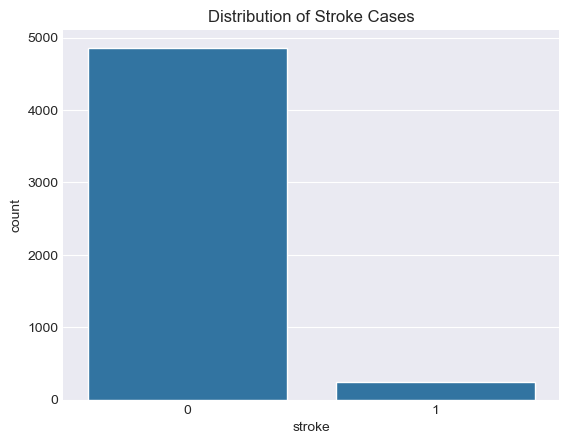

Percentage of each class in the 'stroke' column:
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

Observation: The dataset is highly imbalanced, with strokes accounting for less than 5% of all cases.
This justifies our later use of SMOTE to balance the training data.


In [670]:
# Create a count plot for the 'stroke' column
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke Cases')
plt.show()

# Calculate and print the exact percentage
stroke_percentage = df['stroke'].value_counts(normalize=True) * 100
print("Percentage of each class in the 'stroke' column:")
print(stroke_percentage)

print("\nObservation: The dataset is highly imbalanced, with strokes accounting for less than 5% of all cases.")
print("This justifies our later use of SMOTE to balance the training data.")

**Observation:** The dataset is **highly imbalanced**. The number of patients who had a stroke (1) is far less than those who did not (0). This is a critical finding and must be addressed before modeling.

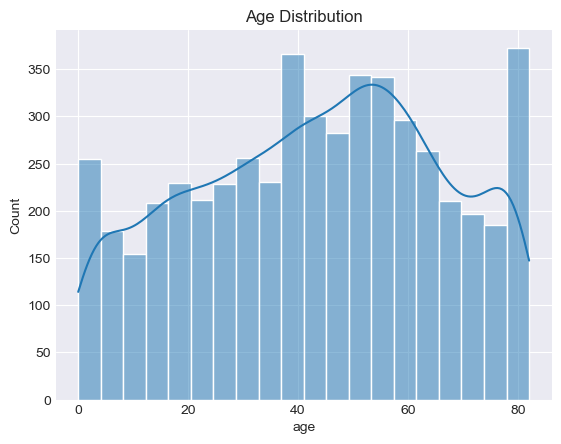

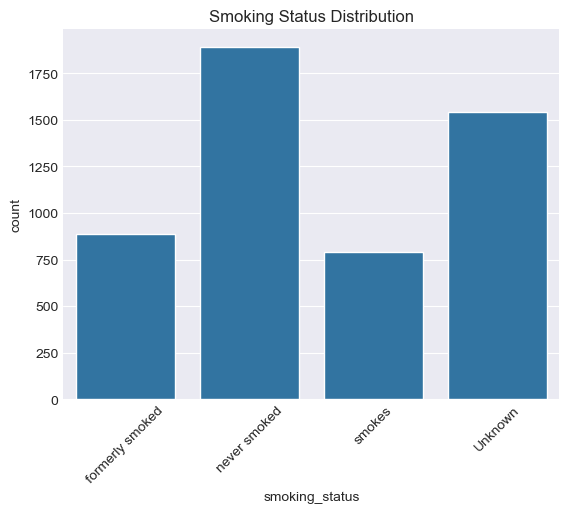

In [671]:
# Example: Age distribution
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Example: Smoking Status
sns.countplot(x='smoking_status', data=df)
plt.title('Smoking Status Distribution')
plt.xticks(rotation=45)
plt.show()

## 5. Data Preprocessing

Now we prepare the data for the machine learning models. This involves converting categorical features into numerical ones and splitting the data into training and testing sets.

### 5.1. Categorical Feature Encoding

Machine learning models require all input features to be numeric. We will use **One-Hot Encoding** to convert categorical columns into a numerical format. The `id` column is just an identifier and is not useful for prediction, so we will drop it.

In [672]:
#  handle the 'Other' gender category 
df = df[df['gender'] != 'Other']

# Drop the 'id' column as it's not a predictive feature
df = df.drop('id', axis=1)

# Use pandas get_dummies to perform one-hot encoding on categorical features
df_processed = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the processed dataframe
df_processed.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.1,1,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.5,1,True,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,True,False,False,True,False,False,False,True,False


### 5.2. Train-Test Split

We split the data into a training set (to build the model) and a testing set (to evaluate the model on unseen data).

In [673]:
# Define our features (X) and target (y)
X = df_processed.drop('stroke', axis=1)
y = df_processed['stroke']

# Split the data into 80% training and 20% testing
# We use 'stratify=y' to ensure the proportion of stroke vs. non-stroke is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 5.3. Handling Class Imbalance with SMOTE

To solve the imbalance problem, we will use the **Synthetic Minority Over-sampling Technique (SMOTE)**. SMOTE creates new, synthetic data points for the minority class (stroke cases).

**Crucial Note:** We only apply SMOTE to the **training data**. We want to evaluate our model on the original, real-world distribution of the test data.

In [674]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of the target variable in the new balanced training set
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: stroke
0    3888
1     199
Name: count, dtype: int64
After SMOTE: stroke
0    3888
1    3888
Name: count, dtype: int64


## 6. Model Training and Evaluation

Now we will train our models on the SMOTE-balanced training data and evaluate them on the original, unbalanced test data. For each model, we will look at key metrics like F1-Score, Precision, Recall, and ROC-AUC, which are more informative than accuracy for imbalanced datasets.

In [675]:
# Create a dictionary to store the results of each model
results = {}

### 6.1. Model 1: Logistic Regression (Baseline)

This is a simple, fundamental classification algorithm that serves as a good baseline.

In [676]:
# 1. Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train_smote, y_train_smote)

# 2. Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

# 3. Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# 4. Store results
results['Logistic Regression'] = {
    'F1-Score': f1_score(y_test, y_pred_log_reg),
    'Precision': precision_score(y_test, y_pred_log_reg),
    'Recall': recall_score(y_test, y_pred_log_reg),
    'ROC-AUC': roc_auc_score(y_test, y_pred_log_reg)
}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       972
           1       0.14      0.44      0.21        50

    accuracy                           0.84      1022
   macro avg       0.55      0.65      0.56      1022
weighted avg       0.93      0.84      0.87      1022



### 6.2. Model 2: K-Nearest Neighbors (KNN)

Now, follow the same 4 steps as above for the KNN model.

In [677]:
# 1. Initialize and train the model
# We choose n_neighbors=5 as a common starting point for KNN.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

# 2. Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# 3. Evaluate the model
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

# 4. Store results in our dictionary for later comparison
results['K-Nearest Neighbors'] = {
    'F1-Score': f1_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'ROC-AUC': roc_auc_score(y_test, y_pred_knn)
} 

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.89       972
           1       0.13      0.52      0.21        50

    accuracy                           0.81      1022
   macro avg       0.55      0.67      0.55      1022
weighted avg       0.93      0.81      0.86      1022



### 6.3. Model 3: Decision Tree

Follow the same pattern for the Decision Tree model.

In [678]:
# 1. Initialize and train the model
# We set random_state=42 to ensure we get the same results every time we run the code.
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smote, y_train_smote)

# 2. Make predictions on the test set
y_pred_dt = dt.predict(X_test)

# 3. Evaluate the model
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# 4. Store results for our final comparison
results['Decision Tree'] = {
    'F1-Score': f1_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'ROC-AUC': roc_auc_score(y_test, y_pred_dt)
}


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       972
           1       0.08      0.16      0.11        50

    accuracy                           0.87      1022
   macro avg       0.52      0.53      0.52      1022
weighted avg       0.91      0.87      0.89      1022



### 6.4. Model 4: Random Forest (Ensemble)

This is our first ensemble model.

In [679]:
# 1. Initialize and train the model
# random_state ensures the results are reproducible.
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# 2. Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# 3. Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# 4. Store results for our final comparison
results['Random Forest'] = {
    'F1-Score': f1_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_pred_rf)
}

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       972
           1       0.18      0.16      0.17        50

    accuracy                           0.92      1022
   macro avg       0.57      0.56      0.57      1022
weighted avg       0.92      0.92      0.92      1022



### 6.5. Model 5: Gradient Boosting (Ensemble)

This is another powerful ensemble model.

In [680]:
# 1. Initialize and train the model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_smote, y_train_smote)

# 2. Make predictions on the test set
y_pred_gb = gb.predict(X_test)

# 3. Evaluate the model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# 4. Store results for our final comparison
results['Gradient Boosting'] = {
    'F1-Score': f1_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb),
    'Recall': recall_score(y_test, y_pred_gb),
    'ROC-AUC': roc_auc_score(y_test, y_pred_gb)
}


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       972
           1       0.16      0.40      0.23        50

    accuracy                           0.87      1022
   macro avg       0.56      0.65      0.58      1022
weighted avg       0.93      0.87      0.89      1022



## 7. Model Comparison

Finally, we will compile the results from all models into a single DataFrame and visualize them to easily compare their performance.

In [681]:
# Convert the results dictionary to a pandas DataFrame
results_df = pd.DataFrame(results).T # .T transposes the DataFrame for better readability

print("Model Performance Comparison:")
results_df

Model Performance Comparison:


,F1-Score,Precision,Recall,ROC-AUC
Logistic Regression,0.208531,0.136646,0.44,0.648498
K-Nearest Neighbors,0.212245,0.133333,0.52,0.673066
Decision Tree,0.108844,0.082474,0.16,0.534218
Random Forest,0.170213,0.181818,0.16,0.561481
Gradient Boosting,0.229885,0.161290,0.40,0.646502


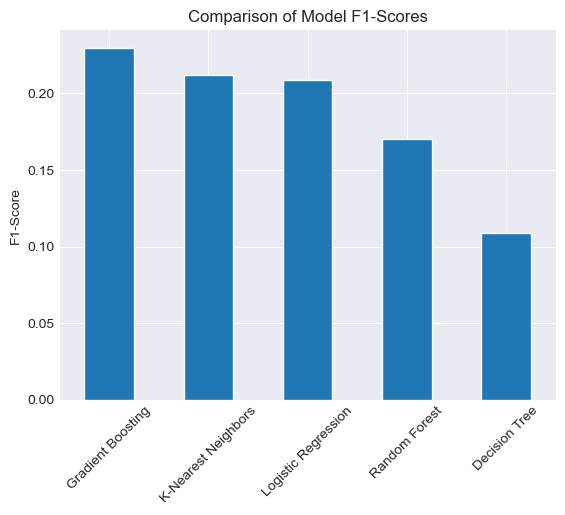

In [682]:
# Visualize the comparison, focusing on F1-Score
results_df['F1-Score'].sort_values(ascending=False).plot(kind='bar')
plt.title('Comparison of Model F1-Scores')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.show()

## 8. Conclusion

In this section, you will write your final report based on the results.

*   **Summary of Work:** Briefly restate the project's objective and the steps you took (EDA, preprocessing with SMOTE, model training).
*   **Best Model:** Identify which model performed the best. Justify your choice by referring to the evaluation metrics (e.g., "The Random Forest model was chosen as the best-performing model due to its highest F1-Score of [value] and ROC-AUC score of [value], indicating a strong balance between precision and recall.").
*   **Insights:** Discuss the results. Did the ensemble models (Random Forest, Gradient Boosting) perform better than the basic models (Logistic Regression, KNN)? Why do you think that is? (Hint: Ensembles combine multiple models to reduce errors and improve generalization).
*   **Limitations & Future Work:** Mention any limitations (e.g., the dataset size is still relatively small) and suggest what could be done next (e.g., collecting more data, trying more advanced models like XGBoost, or performing hyperparameter tuning to optimize the best model).